In [1]:
from __future__ import division, print_function, absolute_import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets("data/MNIST", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# Training parameters
learning_rate = 1e-2
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# network parameters
num_hidden_1 = 256
num_hidden_2 = 128
# MNIST (image shape = 28*28)
img_size_flat = 784
# tf graph input
X = tf.placeholder("float", [None, img_size_flat])

weights = {
    'encoder_h1': tf.Variable(tf.truncated_normal([img_size_flat, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.truncated_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.truncated_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.truncated_normal([num_hidden_1, img_size_flat])),
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([img_size_flat])),
}

In [4]:
def encoder(x):
    # encoder hidden layer with sigmoid activation
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), 
                                   biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    print("weights['encoder_h1']:", weights['encoder_h1'])
    print("biases['encoder_b1']:", biases['encoder_b1'])
    print("layer_1:", layer_1)
    print("weights['encoder_h2']:", weights['encoder_h2'])
    print("biases['encoder_b2']:", biases['encoder_b2'])
    return layer_2

def decoder(x):
    # decoder hidden layer with sigmoid activation
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), 
                                   biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), 
                                   biases['decoder_b2']))
    print("weights['decoder_h1']:", weights['decoder_h1'])
    print("biases['decoder_b1']:", biases['decoder_b1'])
    print("layer_1:", layer_1)
    print("weights['decoder_h2']:", weights['decoder_h2'])
    print("biases['decoder_b2']:", biases['decoder_b2'])
    return layer_2

# construct model 
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# prediction 
y_pred = decoder_op
# target(labels) are the input data
y_true = X

# loss and optimizer
# mean((y_true - y_pred)^2)
cost = tf.reduce_mean(tf.pow(y_true-y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# initialize the variables
init = tf.global_variables_initializer()

weights['encoder_h1']: <tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>
biases['encoder_b1']: <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>
layer_1: Tensor("Sigmoid:0", shape=(?, 256), dtype=float32)
weights['encoder_h2']: <tf.Variable 'Variable_1:0' shape=(256, 128) dtype=float32_ref>
biases['encoder_b2']: <tf.Variable 'Variable_5:0' shape=(128,) dtype=float32_ref>
weights['decoder_h1']: <tf.Variable 'Variable_2:0' shape=(128, 256) dtype=float32_ref>
biases['decoder_b1']: <tf.Variable 'Variable_6:0' shape=(256,) dtype=float32_ref>
layer_1: Tensor("Sigmoid_2:0", shape=(?, 256), dtype=float32)
weights['decoder_h2']: <tf.Variable 'Variable_3:0' shape=(256, 784) dtype=float32_ref>
biases['decoder_b2']: <tf.Variable 'Variable_7:0' shape=(784,) dtype=float32_ref>


In [20]:
sess = tf.Session()

sess.run(init)

# Training
for i in range(1, num_steps+1):
    # get the next batch
    x_batch, _ = data.train.next_batch(batch_size)
    #print(x_batch.dtype) # float32
    #print(x_batch.shape) # (256, 784)
    #print("{0} x_batch: {1}".format(i, x_batch))
    # run optimization op(backprop) and cost op(to get loss value)
    _, loss = sess.run([optimizer, cost], feed_dict={X: x_batch})
    
    if i % display_step ==0 or i ==1:
        print('Step %i: Minibatch Loss:%f' % (i, loss))

Step 1: Minibatch Loss:0.437897
Step 1000: Minibatch Loss:0.118737
Step 2000: Minibatch Loss:0.099630
Step 3000: Minibatch Loss:0.093741
Step 4000: Minibatch Loss:0.087311
Step 5000: Minibatch Loss:0.081753
Step 6000: Minibatch Loss:0.077985
Step 7000: Minibatch Loss:0.073810
Step 8000: Minibatch Loss:0.070637
Step 9000: Minibatch Loss:0.066728
Step 10000: Minibatch Loss:0.063981
Step 11000: Minibatch Loss:0.061177
Step 12000: Minibatch Loss:0.056790
Step 13000: Minibatch Loss:0.055109
Step 14000: Minibatch Loss:0.055346
Step 15000: Minibatch Loss:0.051285
Step 16000: Minibatch Loss:0.049287
Step 17000: Minibatch Loss:0.048772
Step 18000: Minibatch Loss:0.047311
Step 19000: Minibatch Loss:0.046522
Step 20000: Minibatch Loss:0.043475
Step 21000: Minibatch Loss:0.044403
Step 22000: Minibatch Loss:0.046506
Step 23000: Minibatch Loss:0.044938
Step 24000: Minibatch Loss:0.039666
Step 25000: Minibatch Loss:0.040290
Step 26000: Minibatch Loss:0.036242
Step 27000: Minibatch Loss:0.037330
Step 

Original Images


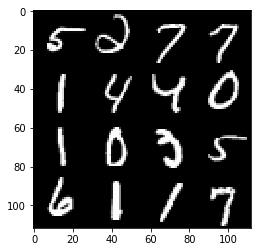

Reconstructed Images


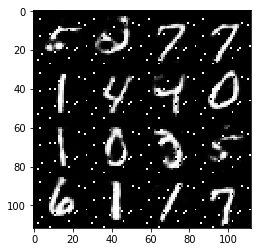

In [29]:
# testing 
# encode and decode images from test set and visualize their reconstruction
n = 4
canvas_orig = np.empty((28*n, 28*n))
#print("canvas_orig:\n", canvas_orig)
canvas_recon = np.empty((28*n, 28*n))
#print("canvas_recon:\n", canvas_recon)
for i in range(n):
    x_batch, _ = data.test.next_batch(n)
    #print(x_batch.dtype) # float32
    #print(x_batch.shape) # (4, 784)
    #print("{0} x_batch: {1}".format(i, x_batch))
    
    # encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: x_batch})
    #print(g.dtype) # float32
    #print(g.shape) # (4, 784)
    #print("{0} g: {1}".format(i, g))  
    
    # display original images
    for j in range(n):
        # draw the generated digits
        # canvas[0:28, 0:28], canvas[0:28, 28:56], [0:28,56:84], [0:28, 84:112]
        # canvas[1:28, 0:28], ..., [1:28, 84,112]
        # canvas[2:28, 0:28], ..., [2:28, 84,112]
        # canvas[3:28, 0:28], ..., [3:28, 84,112]
        canvas_orig[i*28:(i+1)*28, j*28:(j+1)*28] = x_batch[j].reshape([28, 28])
        #print(canvas_orig.dtype) # float64
        #print(canvas_orig.shape) # (112, 112)
        #print("iteration:{0},{1}, canvas_orig:\n {2}".format(i, j, canvas_orig))
        
    # display reconstructed images
    for j in range(n):
        # draw the generated digits
        canvas_recon[i*28:(i+1)*28, j*28:(j+1)*28] = g[j].reshape([28, 28])
        #print(canvas_recon.dtype) # float32
        #print(canvas_recon.shape) # (112, 112)
        #print("iteration:{0},{1}, canvas_recon:\n {2}".format(i, j, canvas_recon))
        
print("Original Images")
plt.figure(figsize=(n, n))
# cmap -> color map
# origin -> 原点的位置. upper -> left upper, lower -> left lower
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()
    
print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()